# Bikeshare Data Wrangling

This assignment loads data from the Citibike Bikeshare, cleans it up, and carries out several basic visualization / analysis operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians

In [2]:
# Load the data
bikeTrips = pd.read_csv("https://s3.amazonaws.com/tripdata/JC-201902-citibike-tripdata.csv.zip")

In [3]:
# Clean up
bikeTrips.drop(['starttime', 'stoptime', 'start station id', 'start station name', 'end station id', 'end station name', 'bikeid', 'usertype'], inplace = True, axis = 1)
bikeTrips.loc[:, 'tripduration':'birth year'] = bikeTrips.loc[:, 'tripduration':'birth year'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
bikeTrips.fillna(-1, inplace = True, axis = 1)

# We'll focus on bike trips 2 hours long or less
shortTrips = bikeTrips.loc[bikeTrips['tripduration'] <= 60*60*2]

(array([1.6721e+04, 1.3010e+03, 2.8700e+02, 1.3000e+02, 3.3000e+01,
        1.9000e+01, 1.5000e+01, 7.0000e+00, 7.0000e+00, 3.0000e+00]),
 array([  61. ,  747.1, 1433.2, 2119.3, 2805.4, 3491.5, 4177.6, 4863.7,
        5549.8, 6235.9, 6922. ]),
 <a list of 10 Patch objects>)

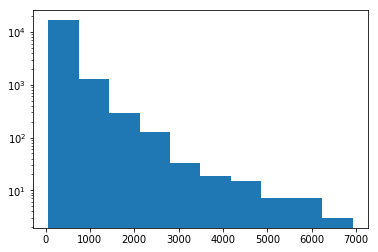

In [4]:
# Plot a historgram of short trip durations (log scale)
plt.hist(shortTrips.tripduration.values, log = True)

In [5]:
# Get a numpy array of short trips
shortVals = shortTrips.values

(array([3.466e+03, 9.061e+03, 3.747e+03, 1.178e+03, 5.270e+02, 3.290e+02,
        1.520e+02, 4.400e+01, 1.800e+01, 1.000e+00]),
 array([0.        , 0.4976732 , 0.99534639, 1.49301959, 1.99069278,
        2.48836598, 2.98603917, 3.48371237, 3.98138556, 4.47905876,
        4.97673195]),
 <a list of 10 Patch objects>)

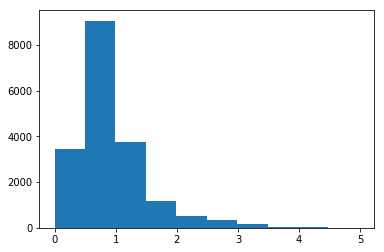

In [6]:
# Calculate the distance of each trip in km, based on https://stackoverflow.com/a/19412565
R = 6373.0 # approximate radius of earth in km
distances = []
for trip in shortVals:
    lat1 = radians(trip[1])
    lon1 = radians(trip[2])
    lat2 = radians(trip[3])
    lon2 = radians(trip[4])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distances.append(distance)
plt.hist(distances)

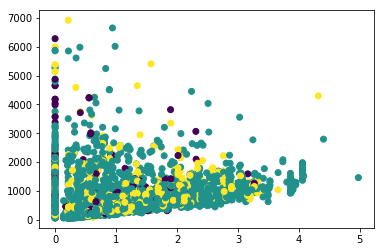

In [7]:
# Make a scatter plot of trips, where the x axis is trip distance in km, the y axis is trip length in seconds,
# and the color of the dot is the rider's gender
plt.scatter(x = distances, y = shortTrips.tripduration.values, c = shortTrips.gender.values)

## Results

Based on this preliminary visualization / analysis, it appears that bikeshare trips of short durations are substnatially more common than longer ones (see histogram [4]). Additionally, most trips are between 0 and 1.5 km in length, with 0.5-1.0 km being the most common by a considerable margin (see histogram [6]).

Perhaps more interestingly, scatter plot [7] reveals a surprisingly weak relationship between trip duration and trip distance. The blank wedge underneath the main mass of points indicates that, as expected, trips of longer distance require increasing minimum amounts of time. But, beyond that, the time spent travelling a given distance varies quite widely. A possible interpretation of this finding is that many bikeshare users make trips for purposes other than simply moving from Point A to Point B. Perhaps users commonly make stops of varying length along the way, or bike for leisure rather than to commute.